In [22]:
ZOMBIE = "z"
CAR = "c"
ICE_CREAM = "i"
EMPTY = "*"

grid = [
    [ICE_CREAM, EMPTY],
    [ZOMBIE, CAR]
]

for row in grid:
    print(' '.join(row))

i *
z c


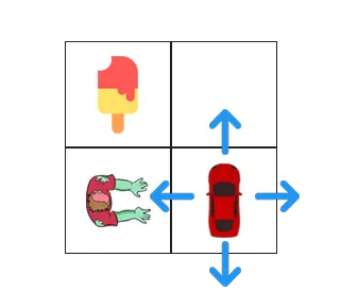

In [23]:
from IPython.display import Image
Image(filename='q_learn.png') 

In [24]:
class State:
    
    def __init__(self, grid, car_pos):
        self.grid = grid
        self.car_pos = car_pos
        
    def __eq__(self, other):
        return isinstance(other, State) and self.grid == other.grid and self.car_pos == other.car_pos
    
    def __hash__(self):
        return hash(str(self.grid) + str(self.car_pos))
    
    def __str__(self):
        return f"State(grid={self.grid}, car_pos={self.car_pos})"

All possible actions:

In [25]:
UP = 0
DOWN = 1
LEFT = 2
RIGHT = 3

ACTIONS = [UP, DOWN, LEFT, RIGHT]

initial state:

In [26]:
start_state = State(grid=grid, car_pos=[1, 1])

function that takes the current state with an action and returns new state, reward and whether or not the episode has completed

In [47]:
from copy import deepcopy

def act(state, action):
    
    def new_car_pos(state, action):
        p = deepcopy(state.car_pos)
        if action == UP:
            p[0] = max(0, p[0] - 1)
        elif action == DOWN:
            p[0] = min(len(state.grid) - 1, p[0] + 1)
        elif action == LEFT:
            p[1] = max(0, p[1] - 1)
        elif action == RIGHT:
            p[1] = min(len(state.grid[0]) - 1, p[1] + 1)
        else:
            raise ValueError(f"Unknown action {action}")
        return p
            
    p = new_car_pos(state, action)
    grid_item = state.grid[p[0]][p[1]]
    
    new_grid = deepcopy(state.grid)
    
    if grid_item == ZOMBIE:
        reward = -10
        is_done = True
        new_grid[p[0]][p[1]] += CAR
    elif grid_item == ICE_CREAM:
        reward = 100
        is_done = True
        new_grid[p[0]][p[1]] += CAR
    elif grid_item == EMPTY:
        reward = -1
        is_done = False
        old = state.car_pos
        new_grid[old[0]][old[1]] = EMPTY
        new_grid[p[0]][p[1]] = CAR
    elif grid_item == CAR:
        reward = -1
        is_done = False
    else:
        raise ValueError(f"Unknown grid item {grid_item}")
    
    return State(grid=new_grid, car_pos=p), reward, is_done

Learning to drive
implementing the Q-learning algorithm and get the ice cream. We have a really small state space, only 4 states. 

In [58]:
import numpy as np
import random

random.seed(42) # for reproducibility

N_STATES = 4
N_EPISODES = 10

MAX_EPISODE_STEPS = 100

MIN_ALPHA = 0.02

alphas = np.linspace(1.0, MIN_ALPHA, N_EPISODES)
gamma = 1.0
eps = 0.2

q_table = dict()

We will decay the learning rate, alpha, every episode - as your agent explores more and more of the environment, he will “believe” that there is not that much left to learn.

In [59]:
def q(state, action=None):
    
    if state not in q_table:
        q_table[state] = np.zeros(len(ACTIONS))
        
    if action is None:
        return q_table[state]
    
    return q_table[state][action]

In [60]:
def choose_action(state):
    if random.uniform(0, 1) < eps:
        return random.choice(ACTIONS) 
    else:
        return np.argmax(q(state))

training agent using the Q-learning algorithm

In [61]:
for e in range(N_EPISODES):
    
    state = start_state
    total_reward = 0
    alpha = alphas[e]
    
    for _ in range(MAX_EPISODE_STEPS):
        action = choose_action(state)
        next_state, reward, done = act(state, action)
        total_reward += reward
        
        q(state)[action] = q(state, action) + \
                alpha * (reward + gamma *  np.max(q(next_state)) - q(state, action))
        state = next_state
        if done:
            break
    print(f"Episode {e + 1}: total reward -> {total_reward}")

Episode 1: total reward -> 99
Episode 2: total reward -> 98
Episode 3: total reward -> 97
Episode 4: total reward -> 97
Episode 5: total reward -> 99
Episode 6: total reward -> 99
Episode 7: total reward -> 98
Episode 8: total reward -> -10
Episode 9: total reward -> -11
Episode 10: total reward -> 99


Initial step of the car, take max decision pts

In [57]:
r = q(start_state)
print(f"up={r[UP]}, down={r[DOWN]}, left={r[LEFT]}, right={r[RIGHT]}")

up=78.50292977777778, down=-0.6733333333333333, left=0.0, right=0.0


move to new state 

In [55]:
new_state, reward, done = act(start_state, UP)

decide next step

In [56]:
r = q(new_state)
print(f"up={r[UP]}, down={r[DOWN]}, left={r[LEFT]}, right={r[RIGHT]}")

up=34.32, down=1.5416924444444444, left=100.0, right=34.32
